## Check the necessary exposure time for Ronchigram simulation
In real experiment, 30 pA can be achieved for 20 mrad range

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import math
import glob
from random import randrange
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [51]:
# modified version, include different convergence angle and different noise level
filelist = glob.glob('/home/chenyu/Desktop/ML_Alignment/AberrationMeasurement/RonchigramSimulation/ronchigram-matlab-master/CoarseCNN_data/*NoAperture_40limit*2.mat')
temp = sio.loadmat(filelist[0])

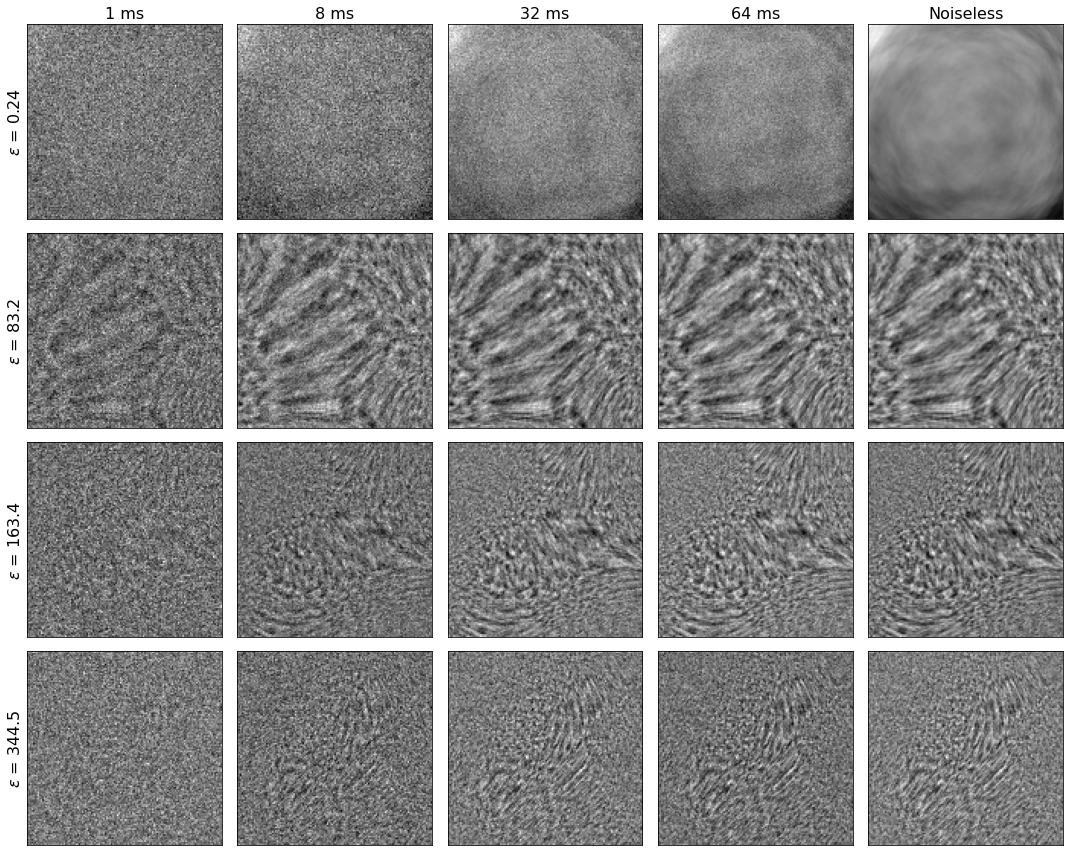

In [68]:
# Acquisition condition for Ronchigrams used when simulating
simdim = 40
numpx = 128
current = 270 # current=30 for 70um aperture, current = 138 for 150 aperture
emit_range = 40

# list for dwell time used in simulation, the large number at the first place is used to simulate noiseless situation
dtime_list = [1, 8, 32, 64, 100000]
index_list = [3187, 2418, 3444, 3969]
emit_list = [0.24, 83.2, 163.4, 344.5, 810.8]

abr_func = temp['chi0_final']
count = 1

fig = plt.figure(figsize=[15,12])
for i in range(len(index_list)):
    temp2 = temp['ronch_final'][:,:,index_list[i]]
    for j in range(len(dtime_list)):
        dtime = dtime_list[j]
        frame = reshape_noise_frame(temp2, numpx, current, dtime)
        
        ax = plt.subplot(len(index_list), len(dtime_list), count)
        im = plt.imshow(frame,cmap='gray')
        plt.xticks([])
        plt.yticks([])
#         divider = make_axes_locatable(ax)
#         cax = divider.append_axes("right", size="5%", pad=0.05)
#         cbar = plt.colorbar(im, cax=cax)
#         cbar.ax.tick_params(labelsize=15)
#         cbar.ax.get_yaxis().labelpad = 15
#         cbar.ax.set_ylabel('e count',fontsize = 12, rotation=270)
        if j == 0:
            ax.set_ylabel('$\epsilon$ = '+str(emit_list[i]), fontsize = 16)
        if i == 0 and j != 4:
            ax.set_title(str(dtime_list[j]) + ' ms',fontsize=16)
        if i == 0 and j == 4:
            ax.set_title('Noiseless', fontsize=16)
        count = count + 1
plt.tight_layout()

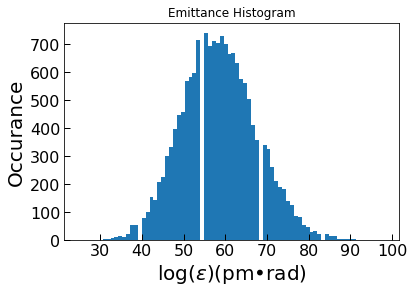

In [39]:
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(np.ndarray.flatten(ronch[0]), bins='auto')  # arguments are passed to np.histogram
plt.title("Emittance Histogram")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('log($\epsilon$)(pm\u2022rad)',fontsize=20)
plt.ylabel('Occurance',fontsize=20,rotation=90)
ax.tick_params(direction='in', length=6, width=1)

Text(0, 0.5, 'e count')

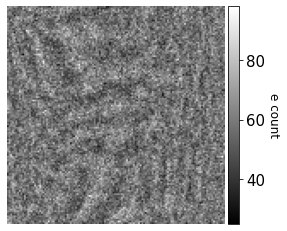

In [45]:
ax = plt.subplot(111)
im = plt.imshow(ronch[0],cmap='gray')
plt.axis('off')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(im, cax=cax)
cbar.ax.tick_params(labelsize=15)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('e count',fontsize = 12, rotation=270)

In [5]:
def reshape_noise_frame(frame, side_length, current, dtime):
# reshape and add noise for a single frame
    temp = rebin(frame,[side_length, side_length])
    # No need to normalize if the input data is already normalized
#     temp = temp / np.sum(temp)
    temp = temp * current * dtime / 1.6 * 10000   # convert to number of electrons
    temp = np.random.poisson(temp)
    return temp

In [7]:
# Function to resample input array (arr) to new_shape, only work when the new shape is integer times smaller than original 
# array.
def rebin(arr, new_shape):
    shape = (new_shape[0], arr.shape[0] // new_shape[0],
             new_shape[1], arr.shape[1] // new_shape[1])
    return arr.reshape(shape).mean(-1).mean(1)